##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Transferência de aprendizado com TensorFlow Hub

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Ver em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver código fonte no GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/images/transfer_learning_with_hub.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixar notebook</a>
  </td>
</table>

O [TensorFlow Hub] (http://tensorflow.org/hub) é uma maneira de compartilhar componentes de modelo pré-treinados. Consulte o [TensorFlow Module Hub] (https://tfhub.dev/) para obter uma lista pesquisável de modelos pré-treinados. Este tutorial demonstra:

1. Como usar o TensorFlow Hub com o `tf.keras`.
1. Como fazer a classificação da imagem usando o TensorFlow Hub.
1. Como fazer um simples aprendizado de transferência.

## Configuração

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install -q tf-nightly
except Exception:
  pass
import tensorflow as tf

You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install -q -U tf-hub-nightly
!pip install -q tfds-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/tmpfs/src/tf_docs_env/bin/python -m pip install --upgrade pip' command.


## Um Classificador ImageNet

### Baixar o classificador

Use `hub.module` para carregar uma mobilenet e `tf.keras.layers.Lambda` para envolvê-la como uma camada keras. Qualquer [URL do classificador de imagem compatível com TensorFlow 2] (https://tfhub.dev/s?q=tf2&module-type=image-classification) do tfhub.dev funcionará aqui.


In [4]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

### Execute-o em uma única imagem

Faça o download de uma única imagem para experimentar o modelo.

 8192/61306 [===>..........................] - ETA: 0s

65536/61306 [================================] - 0s 0us/step


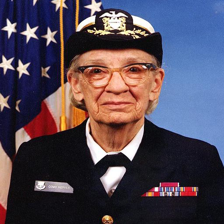

In [6]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [7]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

Adicione uma dimensão em batch e passe a imagem para o modelo.

In [8]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

O resultado é um vetor de 1001 elementos de logits, classificando a probabilidade de cada classe para a imagem.

Portanto, o ID da classe superior pode ser encontrado com argmax:

In [9]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

### Decodificar as previsões

Temos o ID da classe previsto,
Busque as etiquetas `ImageNet` e decodifique as previsões

In [10]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

 8192/10484 [======================>.......] - ETA: 0s

16384/10484 [==============================================] - 0s 0us/step


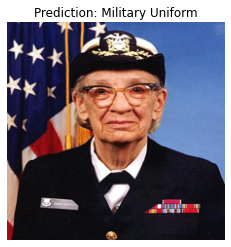

In [11]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

## Transferência de aprendizado simples

Usando o TF Hub, é simples treinar novamente a camada superior do modelo para reconhecer as classes em nosso conjunto de dados.

### Conjunto de Dados

Neste exemplo, você usará o conjunto de dados de flores TensorFlow:

In [12]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

     8192/228813984 [..............................] - ETA: 2s

  5578752/228813984 [..............................] - ETA: 2s

  8396800/228813984 [>.............................] - ETA: 48s

 22552576/228813984 [=>............................] - ETA: 17s

 38133760/228813984 [===>..........................] - ETA: 9s 

 41951232/228813984 [====>.........................] - ETA: 11s

 57114624/228813984 [======>.......................] - ETA: 8s 

 72818688/228813984 [========>.....................] - ETA: 5s

 81092608/228813984 [=========>....................] - ETA: 5s

 96215040/228813984 [===========>..................] - ETA: 3s

111460352/228813984 [=============>................] - ETA: 3s

127205376/228813984 [===============>..............] - ETA: 2s

134225920/228813984 [================>.............] - ETA: 2s

149045248/228813984 [==================>...........] - ETA: 1s

164954112/228813984 [====================>.........] - ETA: 1s

180723712/228813984 [======================>.......] - ETA: 1s

196534272/228813984 [========================>.....] - ETA: 0s

212320256/228813984 [==========================>...] - ETA: 0s

227868672/228813984 [============================>.] - ETA: 0s

228818944/228813984 [==============================] - 4s 0us/step


A maneira mais simples de carregar esses dados em nosso modelo é usando `tf.keras.preprocessing.image.ImageDataGenerator`,

Todos os módulos de imagem do TensorFlow Hub esperam entradas flutuantes na faixa `[0,1]`. Use o parâmetro `rescale` do `ImageDataGenerator` para conseguir isso.

O tamanho da imagem será tratado posteriormente.

In [13]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


O objeto resultante é um iterador que retorna os pares `image_batch, label_batch`.

In [14]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


### Rode o classificador em um lote de imagens

Agora, execute o classificador em um lote de imagens.

In [15]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [16]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['mushroom', 'sea urchin', 'green lizard', 'daisy', 'cardoon',
       'plow', 'daisy', 'greenhouse', 'daisy', 'velvet', 'pot', 'daisy',
       'daisy', 'cardoon', 'daisy', 'daisy', 'coral fungus', 'daisy',
       'tractor', 'daisy', 'daisy', 'vase', 'rapeseed',
       "yellow lady's slipper", "yellow lady's slipper", 'vase', 'daisy',
       'daisy', 'bee', 'daisy', 'daisy', 'hip'], dtype='<U30')

Agora verifique como essas previsões estão alinhadas com as imagens:

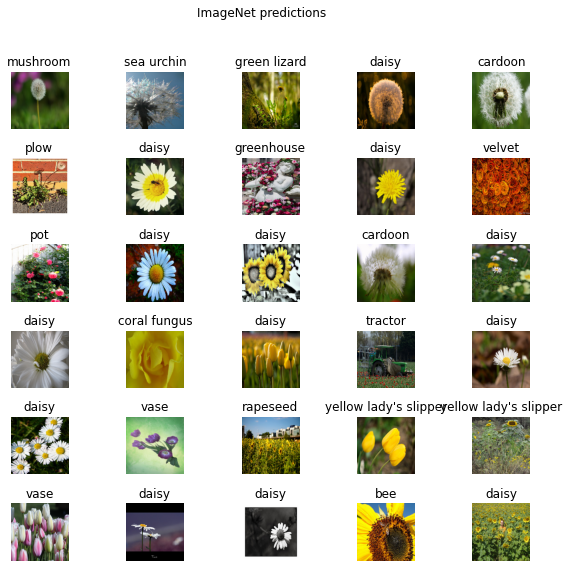

In [17]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

Veja o arquivo `LICENSE.txt` para atribuições de imagem.

Os resultados estão longe de serem perfeitos, mas razoáveis, considerando que essas não são as classes para as quais o modelo foi treinado (exceto "daisy").

### Faça o download do modelo sem cabeça

O TensorFlow Hub também distribui modelos sem a camada de classificação superior. Eles podem ser usados para transferir facilmente o aprendizado.

Qualquer [URL do vetor de recurso de imagem compatível com Tensorflow 2] (https://tfhub.dev/s?module-type=image-feature-vector&q=tf2) do tfhub.dev funcionará aqui.

In [18]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

Crie o extrator de características.

In [19]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

Isto retorna um vetor de tamanho 1280 para cada imagem:

In [20]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


Congele as variáveis na camada extrator de característica, para que o treinamento modifique apenas a nova camada do classificador.

In [21]:
feature_extractor_layer.trainable = False

### Anexar um cabeçalho de classificação

Agora envolva a camada do hub em um modelo `tf.keras.Sequential` e adicione uma nova camada de classificação.

In [22]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
predictions = model(image_batch)

In [24]:
predictions.shape

TensorShape([32, 5])

### Treine o Modelo

Use compile para configurar o processo de treinamento:

In [25]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

Agora use o método `.fit` para treinar o modelo.

Para manter este exemplo, treine apenas duas épocas. Para visualizar o progresso do treinamento, use um retorno de chamada personalizado para registrar a perda e a acurácia de cada lote individualmente, em vez da média da época.

In [26]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [27]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

/tmpfs/src/tf_docs_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1799: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2


  1/115 [..............................] - ETA: 5:26 - loss: 2.2827 - acc: 0.1562

  2/115 [..............................] - ETA: 40s - loss: 2.0535 - acc: 0.1875 

  3/115 [..............................] - ETA: 39s - loss: 1.8939 - acc: 0.2396

  4/115 [>.............................] - ETA: 38s - loss: 1.8444 - acc: 0.2422

  5/115 [>.............................] - ETA: 37s - loss: 1.8182 - acc: 0.2500

  6/115 [>.............................] - ETA: 37s - loss: 1.7846 - acc: 0.2656

  7/115 [>.............................] - ETA: 37s - loss: 1.7527 - acc: 0.2589

  8/115 [=>............................] - ETA: 36s - loss: 1.7308 - acc: 0.2812

  9/115 [=>............................] - ETA: 36s - loss: 1.6836 - acc: 0.3090

 10/115 [=>............................] - ETA: 35s - loss: 1.6612 - acc: 0.3187

 11/115 [=>............................] - ETA: 35s - loss: 1.5988 - acc: 0.3551

 12/115 [==>...........................] - ETA: 35s - loss: 1.5893 - acc: 0.3620

 13/115 [==>...........................] - ETA: 34s - loss: 1.5614 - acc: 0.3774

 14/115 [==>...........................] - ETA: 34s - loss: 1.5388 - acc: 0.3884

 15/115 [==>...........................] - ETA: 33s - loss: 1.5029 - acc: 0.4042

 16/115 [===>..........................] - ETA: 33s - loss: 1.4796 - acc: 0.4062

 17/115 [===>..........................] - ETA: 33s - loss: 1.4504 - acc: 0.4228

 18/115 [===>..........................] - ETA: 32s - loss: 1.4357 - acc: 0.4253

 19/115 [===>..........................] - ETA: 32s - loss: 1.4107 - acc: 0.4375

 20/115 [====>.........................] - ETA: 32s - loss: 1.3866 - acc: 0.4437

 21/115 [====>.........................] - ETA: 31s - loss: 1.3642 - acc: 0.4524

 22/115 [====>.........................] - ETA: 31s - loss: 1.3313 - acc: 0.4730

 23/115 [=====>........................] - ETA: 31s - loss: 1.3094 - acc: 0.4851

 24/115 [=====>........................] - ETA: 30s - loss: 1.2883 - acc: 0.4974

 25/115 [=====>........................] - ETA: 30s - loss: 1.2626 - acc: 0.5088

 26/115 [=====>........................] - ETA: 30s - loss: 1.2445 - acc: 0.5216

 27/115 [======>.......................] - ETA: 29s - loss: 1.2252 - acc: 0.5289

 28/115 [======>.......................] - ETA: 29s - loss: 1.2059 - acc: 0.5368

 29/115 [======>.......................] - ETA: 29s - loss: 1.1867 - acc: 0.5474

 30/115 [======>.......................] - ETA: 28s - loss: 1.1716 - acc: 0.5542

 31/115 [=======>......................] - ETA: 28s - loss: 1.1553 - acc: 0.5615

 32/115 [=======>......................] - ETA: 28s - loss: 1.1480 - acc: 0.5625

 33/115 [=======>......................] - ETA: 27s - loss: 1.1356 - acc: 0.5691

 34/115 [=======>......................] - ETA: 27s - loss: 1.1208 - acc: 0.5754

 35/115 [========>.....................] - ETA: 27s - loss: 1.1059 - acc: 0.5804

 36/115 [========>.....................] - ETA: 26s - loss: 1.0940 - acc: 0.5851

 37/115 [========>.....................] - ETA: 26s - loss: 1.0783 - acc: 0.5929

 38/115 [========>.....................] - ETA: 26s - loss: 1.0636 - acc: 0.5979

 39/115 [=========>....................] - ETA: 25s - loss: 1.0490 - acc: 0.6066

 40/115 [=========>....................] - ETA: 25s - loss: 1.0349 - acc: 0.6117

 41/115 [=========>....................] - ETA: 25s - loss: 1.0271 - acc: 0.6159

 42/115 [=========>....................] - ETA: 24s - loss: 1.0185 - acc: 0.6198

 43/115 [==========>...................] - ETA: 24s - loss: 1.0078 - acc: 0.6257

 44/115 [==========>...................] - ETA: 23s - loss: 1.0014 - acc: 0.6307

 45/115 [==========>...................] - ETA: 23s - loss: 0.9896 - acc: 0.6354

 46/115 [===========>..................] - ETA: 23s - loss: 0.9814 - acc: 0.6399

 47/115 [===========>..................] - ETA: 22s - loss: 0.9736 - acc: 0.6430

 48/115 [===========>..................] - ETA: 22s - loss: 0.9688 - acc: 0.6458

 49/115 [===========>..................] - ETA: 22s - loss: 0.9596 - acc: 0.6505

 50/115 [============>.................] - ETA: 21s - loss: 0.9528 - acc: 0.6538

 51/115 [============>.................] - ETA: 21s - loss: 0.9425 - acc: 0.6575

 52/115 [============>.................] - ETA: 21s - loss: 0.9360 - acc: 0.6587

 53/115 [============>.................] - ETA: 20s - loss: 0.9226 - acc: 0.6645

 54/115 [=============>................] - ETA: 20s - loss: 0.9123 - acc: 0.6684

 55/115 [=============>................] - ETA: 20s - loss: 0.9071 - acc: 0.6710

 56/115 [=============>................] - ETA: 19s - loss: 0.9000 - acc: 0.6741

 57/115 [=============>................] - ETA: 19s - loss: 0.8930 - acc: 0.6771

 58/115 [==============>...............] - ETA: 19s - loss: 0.8863 - acc: 0.6783

 59/115 [==============>...............] - ETA: 18s - loss: 0.8804 - acc: 0.6806

 60/115 [==============>...............] - ETA: 18s - loss: 0.8777 - acc: 0.6813

 61/115 [==============>...............] - ETA: 18s - loss: 0.8731 - acc: 0.6824

 62/115 [===============>..............] - ETA: 17s - loss: 0.8671 - acc: 0.6840

 63/115 [===============>..............] - ETA: 17s - loss: 0.8611 - acc: 0.6870

 64/115 [===============>..............] - ETA: 17s - loss: 0.8560 - acc: 0.6890

 65/115 [===============>..............] - ETA: 16s - loss: 0.8498 - acc: 0.6913

 66/115 [================>.............] - ETA: 16s - loss: 0.8413 - acc: 0.6951

 67/115 [================>.............] - ETA: 16s - loss: 0.8351 - acc: 0.6978

 68/115 [================>.............] - ETA: 15s - loss: 0.8295 - acc: 0.6999

 69/115 [=================>............] - ETA: 15s - loss: 0.8259 - acc: 0.7006

 70/115 [=================>............] - ETA: 15s - loss: 0.8211 - acc: 0.7031

 71/115 [=================>............] - ETA: 14s - loss: 0.8169 - acc: 0.7042

 72/115 [=================>............] - ETA: 14s - loss: 0.8126 - acc: 0.7057

 73/115 [==================>...........] - ETA: 14s - loss: 0.8113 - acc: 0.7072

 74/115 [==================>...........] - ETA: 13s - loss: 0.8069 - acc: 0.7086

 75/115 [==================>...........] - ETA: 13s - loss: 0.8002 - acc: 0.7117

 76/115 [==================>...........] - ETA: 13s - loss: 0.7962 - acc: 0.7130

 77/115 [===================>..........] - ETA: 12s - loss: 0.7952 - acc: 0.7135

 78/115 [===================>..........] - ETA: 12s - loss: 0.7923 - acc: 0.7147

 79/115 [===================>..........] - ETA: 12s - loss: 0.7879 - acc: 0.7164

 80/115 [===================>..........] - ETA: 11s - loss: 0.7842 - acc: 0.7180

 81/115 [====================>.........] - ETA: 11s - loss: 0.7796 - acc: 0.7203

 82/115 [====================>.........] - ETA: 11s - loss: 0.7802 - acc: 0.7191

 83/115 [====================>.........] - ETA: 10s - loss: 0.7742 - acc: 0.7210

 84/115 [====================>.........] - ETA: 10s - loss: 0.7715 - acc: 0.7221

 85/115 [=====================>........] - ETA: 10s - loss: 0.7680 - acc: 0.7232

 86/115 [=====================>........] - ETA: 9s - loss: 0.7635 - acc: 0.7253 

 87/115 [=====================>........] - ETA: 9s - loss: 0.7593 - acc: 0.7270

 88/115 [=====================>........] - ETA: 9s - loss: 0.7567 - acc: 0.7283

 89/115 [======================>.......] - ETA: 8s - loss: 0.7539 - acc: 0.7296

 90/115 [======================>.......] - ETA: 8s - loss: 0.7519 - acc: 0.7302

 91/115 [======================>.......] - ETA: 8s - loss: 0.7494 - acc: 0.7311

 92/115 [=======================>......] - ETA: 7s - loss: 0.7448 - acc: 0.7327

 93/115 [=======================>......] - ETA: 7s - loss: 0.7398 - acc: 0.7349

 94/115 [=======================>......] - ETA: 7s - loss: 0.7387 - acc: 0.7344

 95/115 [=======================>......] - ETA: 6s - loss: 0.7359 - acc: 0.7355

 96/115 [========================>.....] - ETA: 6s - loss: 0.7337 - acc: 0.7367

 97/115 [========================>.....] - ETA: 6s - loss: 0.7294 - acc: 0.7384

 98/115 [========================>.....] - ETA: 5s - loss: 0.7250 - acc: 0.7408

 99/115 [========================>.....] - ETA: 5s - loss: 0.7207 - acc: 0.7427

100/115 [=========================>....] - ETA: 5s - loss: 0.7192 - acc: 0.7434

101/115 [=========================>....] - ETA: 4s - loss: 0.7179 - acc: 0.7432

102/115 [=========================>....] - ETA: 4s - loss: 0.7155 - acc: 0.7442

103/115 [=========================>....] - ETA: 4s - loss: 0.7122 - acc: 0.7454

104/115 [==========================>...] - ETA: 3s - loss: 0.7094 - acc: 0.7458

105/115 [==========================>...] - ETA: 3s - loss: 0.7060 - acc: 0.7473

106/115 [==========================>...] - ETA: 3s - loss: 0.7049 - acc: 0.7482

107/115 [==========================>...] - ETA: 2s - loss: 0.7024 - acc: 0.7485

108/115 [===========================>..] - ETA: 2s - loss: 0.6997 - acc: 0.7494

109/115 [===========================>..] - ETA: 2s - loss: 0.6957 - acc: 0.7506

110/115 [===========================>..] - ETA: 1s - loss: 0.6943 - acc: 0.7511

111/115 [===========================>..] - ETA: 1s - loss: 0.6914 - acc: 0.7517

112/115 [============================>.] - ETA: 1s - loss: 0.6877 - acc: 0.7533

113/115 [============================>.] - ETA: 0s - loss: 0.6850 - acc: 0.7547

114/115 [============================>.] - ETA: 0s - loss: 0.6834 - acc: 0.7552

115/115 [==============================] - ETA: 0s - loss: 0.6819 - acc: 0.7562

115/115 [==============================] - 41s 334ms/step - loss: 0.6805 - acc: 0.7571


Epoch 2/2


  1/115 [..............................] - ETA: 47s - loss: 0.1595 - acc: 1.0000

  2/115 [..............................] - ETA: 39s - loss: 0.2053 - acc: 0.9688

  3/115 [..............................] - ETA: 37s - loss: 0.2405 - acc: 0.9375

  4/115 [>.............................] - ETA: 37s - loss: 0.2802 - acc: 0.9219

  5/115 [>.............................] - ETA: 37s - loss: 0.2697 - acc: 0.9250

  6/115 [>.............................] - ETA: 37s - loss: 0.3396 - acc: 0.8906

  7/115 [>.............................] - ETA: 36s - loss: 0.3667 - acc: 0.8884

  8/115 [=>............................] - ETA: 36s - loss: 0.3566 - acc: 0.8945

  9/115 [=>............................] - ETA: 35s - loss: 0.3879 - acc: 0.8715

 10/115 [=>............................] - ETA: 35s - loss: 0.4114 - acc: 0.8594

 11/115 [=>............................] - ETA: 35s - loss: 0.4308 - acc: 0.8494

 12/115 [==>...........................] - ETA: 34s - loss: 0.4158 - acc: 0.8542

 13/115 [==>...........................] - ETA: 34s - loss: 0.4285 - acc: 0.8486

 14/115 [==>...........................] - ETA: 34s - loss: 0.4164 - acc: 0.8527

 15/115 [==>...........................] - ETA: 34s - loss: 0.4199 - acc: 0.8521

 16/115 [===>..........................] - ETA: 33s - loss: 0.4212 - acc: 0.8555

 17/115 [===>..........................] - ETA: 33s - loss: 0.4082 - acc: 0.8621

 18/115 [===>..........................] - ETA: 32s - loss: 0.4053 - acc: 0.8628

 19/115 [===>..........................] - ETA: 32s - loss: 0.3964 - acc: 0.8668

 20/115 [====>.........................] - ETA: 32s - loss: 0.4023 - acc: 0.8625

 21/115 [====>.........................] - ETA: 31s - loss: 0.3952 - acc: 0.8661

 22/115 [====>.........................] - ETA: 31s - loss: 0.3905 - acc: 0.8693

 23/115 [=====>........................] - ETA: 31s - loss: 0.3890 - acc: 0.8682

 24/115 [=====>........................] - ETA: 30s - loss: 0.3933 - acc: 0.8672

 25/115 [=====>........................] - ETA: 30s - loss: 0.3888 - acc: 0.8675

 26/115 [=====>........................] - ETA: 30s - loss: 0.3894 - acc: 0.8690

 27/115 [======>.......................] - ETA: 29s - loss: 0.3896 - acc: 0.8715

 28/115 [======>.......................] - ETA: 29s - loss: 0.3857 - acc: 0.8739

 29/115 [======>.......................] - ETA: 29s - loss: 0.3818 - acc: 0.8750

 30/115 [======>.......................] - ETA: 28s - loss: 0.3824 - acc: 0.8771

 31/115 [=======>......................] - ETA: 28s - loss: 0.3816 - acc: 0.8770

 32/115 [=======>......................] - ETA: 28s - loss: 0.3837 - acc: 0.8770

 33/115 [=======>......................] - ETA: 27s - loss: 0.3785 - acc: 0.8797

 34/115 [=======>......................] - ETA: 27s - loss: 0.3756 - acc: 0.8787

 35/115 [========>.....................] - ETA: 27s - loss: 0.3736 - acc: 0.8812

 36/115 [========>.....................] - ETA: 26s - loss: 0.3709 - acc: 0.8811

 37/115 [========>.....................] - ETA: 26s - loss: 0.3666 - acc: 0.8818

 38/115 [========>.....................] - ETA: 25s - loss: 0.3789 - acc: 0.8750

 39/115 [=========>....................] - ETA: 25s - loss: 0.3795 - acc: 0.8758

 40/115 [=========>....................] - ETA: 25s - loss: 0.3807 - acc: 0.8766

 41/115 [=========>....................] - ETA: 25s - loss: 0.3797 - acc: 0.8773

 42/115 [=========>....................] - ETA: 24s - loss: 0.3759 - acc: 0.8787

 43/115 [==========>...................] - ETA: 24s - loss: 0.3719 - acc: 0.8801

 44/115 [==========>...................] - ETA: 24s - loss: 0.3718 - acc: 0.8800

 45/115 [==========>...................] - ETA: 23s - loss: 0.3705 - acc: 0.8806

 46/115 [===========>..................] - ETA: 23s - loss: 0.3684 - acc: 0.8811

 47/115 [===========>..................] - ETA: 23s - loss: 0.3667 - acc: 0.8816

 48/115 [===========>..................] - ETA: 22s - loss: 0.3660 - acc: 0.8815

 49/115 [===========>..................] - ETA: 22s - loss: 0.3645 - acc: 0.8820

 50/115 [============>.................] - ETA: 22s - loss: 0.3608 - acc: 0.8831

 51/115 [============>.................] - ETA: 21s - loss: 0.3618 - acc: 0.8830

 52/115 [============>.................] - ETA: 21s - loss: 0.3635 - acc: 0.8828

 53/115 [============>.................] - ETA: 21s - loss: 0.3616 - acc: 0.8844

 54/115 [=============>................] - ETA: 20s - loss: 0.3600 - acc: 0.8843

 55/115 [=============>................] - ETA: 20s - loss: 0.3659 - acc: 0.8818

 56/115 [=============>................] - ETA: 20s - loss: 0.3645 - acc: 0.8823

 57/115 [=============>................] - ETA: 19s - loss: 0.3645 - acc: 0.8810

 58/115 [==============>...............] - ETA: 19s - loss: 0.3614 - acc: 0.8825

 59/115 [==============>...............] - ETA: 19s - loss: 0.3604 - acc: 0.8824

 60/115 [==============>...............] - ETA: 18s - loss: 0.3610 - acc: 0.8828

 61/115 [==============>...............] - ETA: 18s - loss: 0.3590 - acc: 0.8832

 62/115 [===============>..............] - ETA: 18s - loss: 0.3612 - acc: 0.8821

 63/115 [===============>..............] - ETA: 17s - loss: 0.3608 - acc: 0.8814

 64/115 [===============>..............] - ETA: 17s - loss: 0.3576 - acc: 0.8828

 65/115 [===============>..............] - ETA: 17s - loss: 0.3570 - acc: 0.8832

 66/115 [================>.............] - ETA: 16s - loss: 0.3551 - acc: 0.8840

 67/115 [================>.............] - ETA: 16s - loss: 0.3524 - acc: 0.8857

 68/115 [================>.............] - ETA: 15s - loss: 0.3526 - acc: 0.8860

 69/115 [=================>............] - ETA: 15s - loss: 0.3541 - acc: 0.8841

 70/115 [=================>............] - ETA: 15s - loss: 0.3521 - acc: 0.8844

 71/115 [=================>............] - ETA: 14s - loss: 0.3493 - acc: 0.8856

 72/115 [=================>............] - ETA: 14s - loss: 0.3508 - acc: 0.8850

 73/115 [==================>...........] - ETA: 14s - loss: 0.3512 - acc: 0.8848

 74/115 [==================>...........] - ETA: 13s - loss: 0.3500 - acc: 0.8851

 75/115 [==================>...........] - ETA: 13s - loss: 0.3534 - acc: 0.8842

 76/115 [==================>...........] - ETA: 13s - loss: 0.3533 - acc: 0.8836

 77/115 [===================>..........] - ETA: 12s - loss: 0.3533 - acc: 0.8835

 78/115 [===================>..........] - ETA: 12s - loss: 0.3540 - acc: 0.8834

 79/115 [===================>..........] - ETA: 12s - loss: 0.3531 - acc: 0.8833

 80/115 [===================>..........] - ETA: 11s - loss: 0.3530 - acc: 0.8832

 81/115 [====================>.........] - ETA: 11s - loss: 0.3536 - acc: 0.8827

 82/115 [====================>.........] - ETA: 11s - loss: 0.3522 - acc: 0.8838

 83/115 [====================>.........] - ETA: 10s - loss: 0.3518 - acc: 0.8833

 84/115 [====================>.........] - ETA: 10s - loss: 0.3496 - acc: 0.8843

 85/115 [=====================>........] - ETA: 10s - loss: 0.3494 - acc: 0.8846

 86/115 [=====================>........] - ETA: 9s - loss: 0.3479 - acc: 0.8852 

 87/115 [=====================>........] - ETA: 9s - loss: 0.3465 - acc: 0.8858

 88/115 [=====================>........] - ETA: 9s - loss: 0.3455 - acc: 0.8860

 89/115 [======================>.......] - ETA: 8s - loss: 0.3441 - acc: 0.8862

 90/115 [======================>.......] - ETA: 8s - loss: 0.3436 - acc: 0.8865

 91/115 [======================>.......] - ETA: 8s - loss: 0.3419 - acc: 0.8874

 92/115 [=======================>......] - ETA: 7s - loss: 0.3402 - acc: 0.8879

 93/115 [=======================>......] - ETA: 7s - loss: 0.3394 - acc: 0.8878

 94/115 [=======================>......] - ETA: 7s - loss: 0.3382 - acc: 0.8880

 95/115 [=======================>......] - ETA: 6s - loss: 0.3390 - acc: 0.8882

 96/115 [========================>.....] - ETA: 6s - loss: 0.3394 - acc: 0.8883

 97/115 [========================>.....] - ETA: 6s - loss: 0.3421 - acc: 0.8872

 98/115 [========================>.....] - ETA: 5s - loss: 0.3421 - acc: 0.8874

 99/115 [========================>.....] - ETA: 5s - loss: 0.3420 - acc: 0.8867

100/115 [=========================>....] - ETA: 5s - loss: 0.3413 - acc: 0.8866

101/115 [=========================>....] - ETA: 4s - loss: 0.3404 - acc: 0.8874

102/115 [=========================>....] - ETA: 4s - loss: 0.3395 - acc: 0.8873

103/115 [=========================>....] - ETA: 4s - loss: 0.3392 - acc: 0.8871

104/115 [==========================>...] - ETA: 3s - loss: 0.3386 - acc: 0.8876

105/115 [==========================>...] - ETA: 3s - loss: 0.3374 - acc: 0.8881

106/115 [==========================>...] - ETA: 3s - loss: 0.3383 - acc: 0.8880

107/115 [==========================>...] - ETA: 2s - loss: 0.3369 - acc: 0.8887

108/115 [===========================>..] - ETA: 2s - loss: 0.3376 - acc: 0.8886

109/115 [===========================>..] - ETA: 2s - loss: 0.3377 - acc: 0.8888

110/115 [===========================>..] - ETA: 1s - loss: 0.3378 - acc: 0.8884

111/115 [===========================>..] - ETA: 1s - loss: 0.3375 - acc: 0.8885

112/115 [============================>.] - ETA: 1s - loss: 0.3371 - acc: 0.8887

113/115 [============================>.] - ETA: 0s - loss: 0.3393 - acc: 0.8880

114/115 [============================>.] - ETA: 0s - loss: 0.3388 - acc: 0.8879

115/115 [==============================] - ETA: 0s - loss: 0.3388 - acc: 0.8875

115/115 [==============================] - 39s 338ms/step - loss: 0.3387 - acc: 0.8871


Agora, depois de apenas algumas iterações de treinamento, já podemos ver que o modelo está progredindo na tarefa.

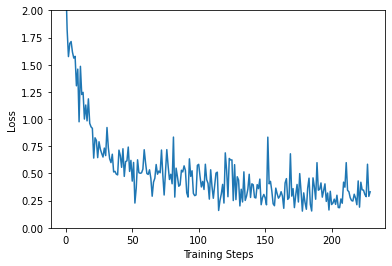

In [28]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

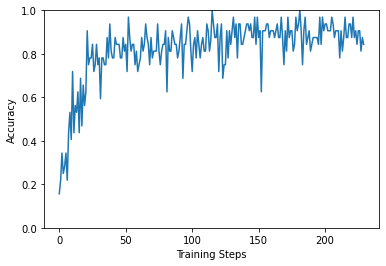

In [29]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

### Verificando as previsões

Para refazer a plotagem de antes, primeiro obtenha a lista ordenada de nomes de classe:

In [30]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

Execute o lote de imagens através do modelo e converta os índices em nomes de classe.

In [31]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

Plote o resultado

In [32]:
label_id = np.argmax(label_batch, axis=-1)

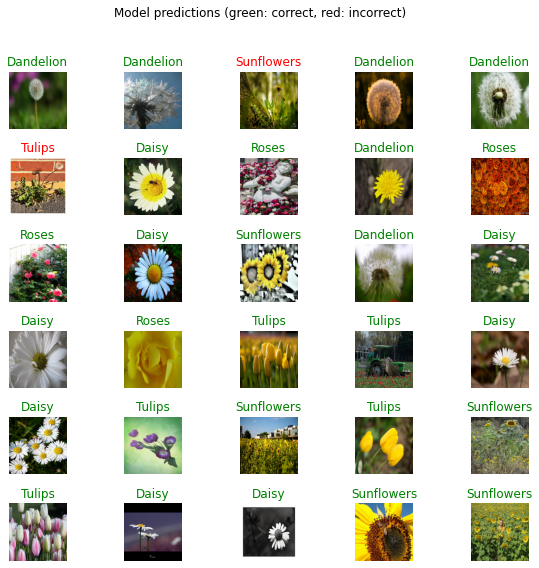

In [33]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Exporte seu modelo

Agora que você treinou o modelo, exporte-o como um modelo salvo:

In [34]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

/tmpfs/src/tf_docs_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:2289: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/tmpfs/src/tf_docs_env/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py:1377: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: /tmp/saved_models/1600797460/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1600797460/assets


'/tmp/saved_models/1600797460'

Agora confirme que podemos recarregá-lo e ainda dá os mesmos resultados:

In [35]:
reloaded = tf.keras.models.load_model(export_path)

In [36]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [37]:
abs(reloaded_result_batch - result_batch).max()

0.0

Este modelo salvo pode ser carregado para inferência posteriormente ou convertido para [TFLite] (https://www.tensorflow.org/lite/convert/) ou [TFjs] (https://github.com/tensorflow/tfjs-converter).
